<a href="https://colab.research.google.com/github/alberthtan/Data-Visualization/blob/main/Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Visualization**

Datasets

https://drive.google.com/drive/folders/1NxCh4X7u7wVo5aHojxjLNs9wC7B7zJhb?usp=sharing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Creating a statistical summary of the data in the file “CommuteStLouis.csv”. Plot a histogram of age for the CommuteStLouis data.

          City  Age  Distance  Time Sex
0    St. Louis   52        10    20   M
1    St. Louis   21        35    40   F
2    St. Louis   23        40    45   F
3    St. Louis   38         0     2   M
4    St. Louis   26        15    25   M
..         ...  ...       ...   ...  ..
495  St. Louis   49        10    15   F
496  St. Louis   57         2     5   F
497  St. Louis   35         0     5   F
498  St. Louis   32        10    30   M
499  St. Louis   35         8    10   F

[500 rows x 5 columns]
             Age    Distance        Time
count  500.00000  500.000000  500.000000
mean    41.38800   14.156000   21.970000
std     13.79994   10.748895   14.232436
min     16.00000    0.000000    1.000000
25%     30.00000    6.000000   11.500000
50%     42.00000   11.000000   20.000000
75%     52.00000   20.000000   30.000000
max     84.00000   80.000000  130.000000


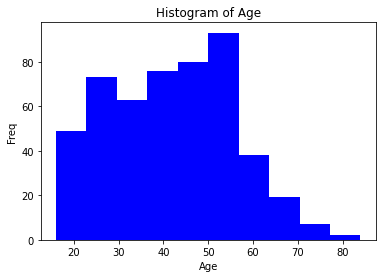

In [3]:
df = pd.read_csv('CommuteStLouis.csv')
print(df)

print(df.describe())

plt.hist(df['Age'], bins=10, color='b')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.title('Histogram of Age')
plt.show()

2.a Producing a correlation matrix of age, distance and time. Finding the highest correlated pair.



In [4]:
print(df.corr())
print("Distance and Time are the most highly correlated with a correlation coefficient of 0.830241")


               Age  Distance      Time
Age       1.000000 -0.000774  0.030292
Distance -0.000774  1.000000  0.830241
Time      0.030292  0.830241  1.000000
Distance and Time are the most highly correlated with a correlation coefficient of 0.830241


2.b Creating a scatterplot matrix of the numeric variables in the data. Determining skewness.

They are all skewed to the right


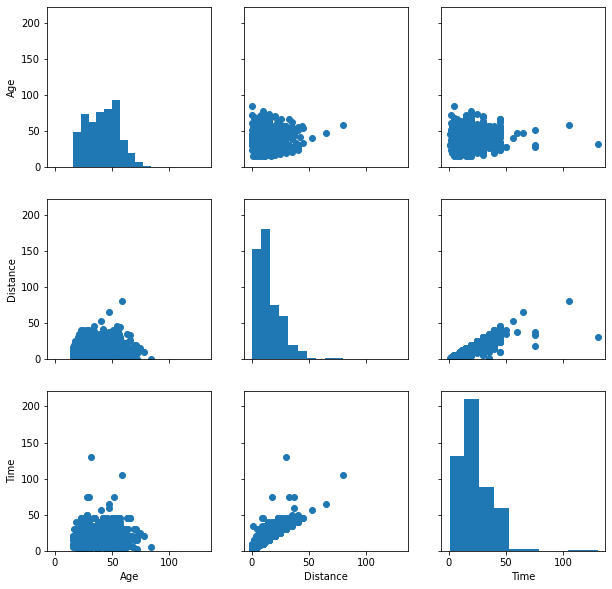

In [5]:
s = ['Age', 'Distance', 'Time']
myFig, myAxes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 10))
for i in range(3):
  for j in range(3):
    myAxes[2, j].set_xlabel(s[j])
    myAxes[i, 0].set_ylabel(s[i])
    if i == j:
      myAxes[i, j].hist(df[s[i]], bins=10)
    else:
      myAxes[i, j].scatter(df[s[j]], df[s[i]])
print("They are all skewed to the right")

2.c Producing a side-by-side boxplot of distance travelled by gender. Making conclusions.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


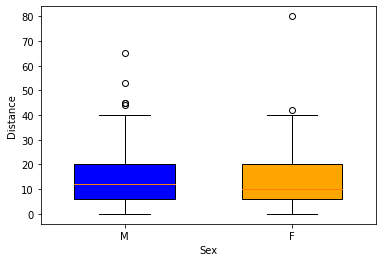

The data indicates that the average woman commutes slightly shorter than the average man


In [6]:
box = plt.boxplot([df['Distance'][df['Sex'] == 'M'], df['Distance'][df['Sex'] == 'F']], labels=['M', 'F'], patch_artist=True, widths=0.6)
plt.xlabel("Sex")
plt.ylabel("Distance")
colors = ['blue', 'orange']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.show()
print("The data indicates that the average woman commutes slightly shorter than the average man")

3. Scatter plot for the pair in 2.a. Superimposing a linear regression line on the plot.

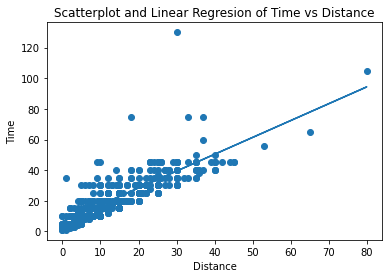

In [7]:
plt.scatter(df["Distance"], df["Time"])
plt.title("Scatterplot and Linear Regresion of Time vs Distance")

m, b = np.polyfit(df["Distance"], df["Time"], 1)
plt.plot(df["Distance"], m*df["Distance"] + b)

plt.xlabel("Distance")
plt.ylabel("Time")

plt.show()

4. Showing the distribution of residuals of the data from Part 3.

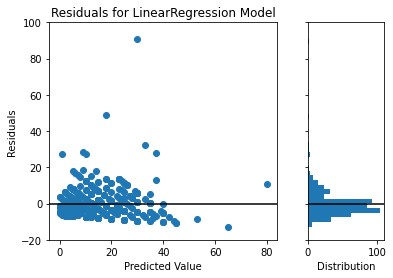

In [8]:
fig, ax = plt.subplots(1, 2, sharey=True, gridspec_kw={'width_ratios': [3, 1]})

ax[0].scatter(df["Distance"], df["Time"] - (m*df["Distance"] + b))
ax[0].axhline(y=0, color='black', linestyle='-')

ax[0].set_title("Residuals for LinearRegression Model")
ax[0].set_ylabel("Residuals")
ax[0].set_xlabel("Predicted Value")
plt.ylim(-20, 100)

ax[1].axhline(y=0, color='black', linestyle='-')
ax[1].hist(df["Time"] - (m*df["Distance"] + b), bins=40, orientation="horizontal")
ax[1].set_xlabel("Distribution")

plt.show()